<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/%5Bsklearn%5DHeartDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제정의: 환자 정보를 사용하여 심장 질환 유무(정상 :0, 심장 질환 진단: 1)를 분류하는 이중 분류 문제로 정의


데이터 다운로드 : https://archive.ics.uci.edu/ml/datasets/heart+disease


기본 라이브러리 불러오기

In [ ]:
#Libraries for reading and handling the data
import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Libraries for Analysing the ML model
from sklearn import metrics

[step1] 데이터 준비하기

In [ ]:
df =pd.read_csv('heart.csv')

[step2] 데이터 탐색

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# null 값 확인
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

[step3] 데이터 전처리

In [ ]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var=['sex','cp','fbs','restecg','exng','slp','caa','thall']
df[categorical_var]=df[categorical_var].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


[step3-1] 데이터 **시각화해보기**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



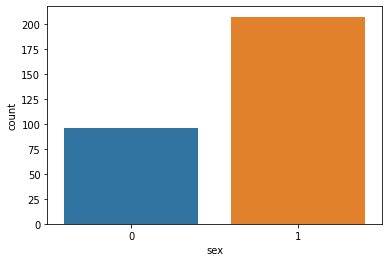

In [ ]:
# 성별에  따른 환자의 수(남자 1 여자 0)
sns.countplot(df.sex)

In [ ]:
df.groupby('cp').sum().reset_index()[['cp','output']]

,cp,output
0,0,39
1,1,41
2,2,69
3,3,16


In [ ]:
# 환자의 가슴 통증 타입 별 환자 수 (cp: chest pain type)
px.bar(df.groupby('cp').sum().reset_index()[['cp','output']],
       x='cp',y='output',color='cp',
       title ='Count plot of Heart Disease with Respect to Chest Pain')

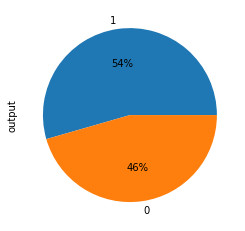

In [ ]:
# 정상- 심장병 환자 비율(0: 정상 1:심장병)
df.output.value_counts().plot.pie(autopct='%1.f%%')

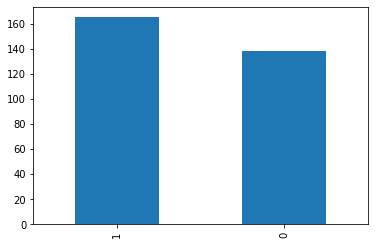

In [ ]:
# 정상- 심장병 환자 비율(0: 정상 1:심장병)
df.output.value_counts().plot.bar()

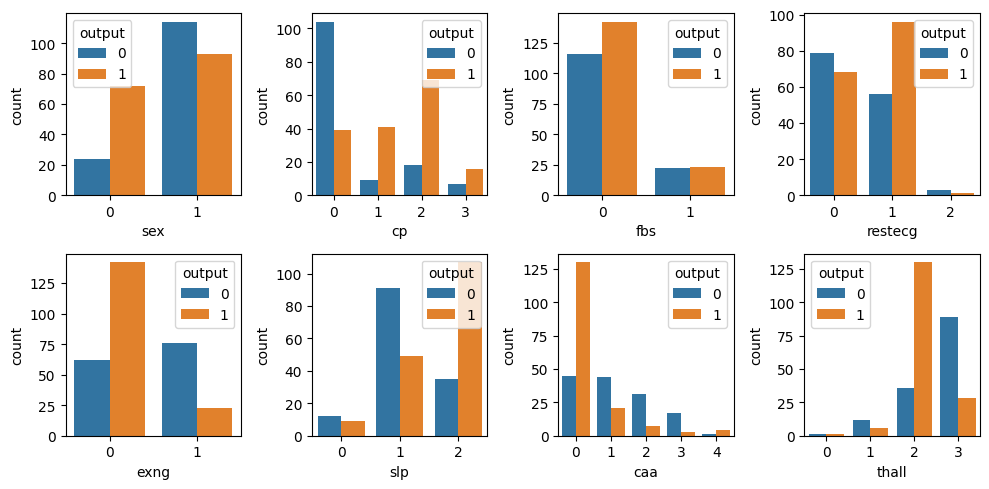

In [ ]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인

fig, ax =plt.subplots(2,4,figsize=(10,5),dpi=100)
for  axis, cat_var in zip(ax.ravel(),categorical_var) :
  sns.countplot(x=cat_var,data=df,hue='output',ax=axis)

plt.tight_layout()

In [ ]:
# 수치형으로 되어 있는 컬럼 -> 이상치 확인
numeric_var =[i for i in df.columns if i not in categorical_var][:-1]
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

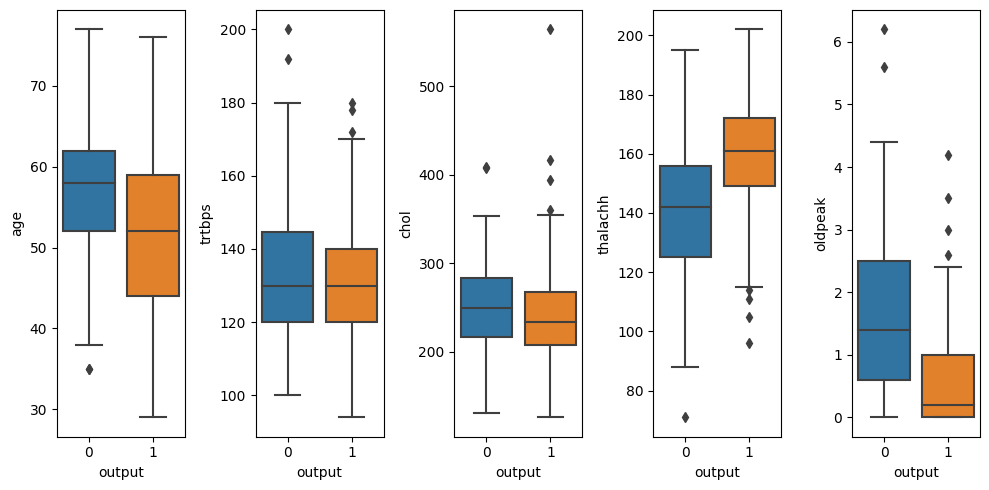

In [ ]:
fig, ax =plt.subplots(1,5,figsize=(10,5),dpi=100)
for  axis, num_var in zip(ax,numeric_var) :
  sns.boxplot(y=num_var,data=df,x='output',ax=axis)

plt.tight_layout()

In [ ]:
# 이상치 삭제 trtbp,chol,thalachh,oldpeak	
# 상위 95%에 위치하고 있는 데이터 셋만 삭제
# 하위 5%에 위치하고 있는 데이터 셋도 삭제
df = df[df['trtbps']<df['trtbps'].quantile(0.95)] # quantile 백분위수 구하는 함수
df = df[df['chol']<df['chol'].quantile(0.95)]
df = df[df['thalachh']>df['thalachh'].quantile(0.05)]
df = df[df['oldpeak']<df['oldpeak'].quantile(0.95)]

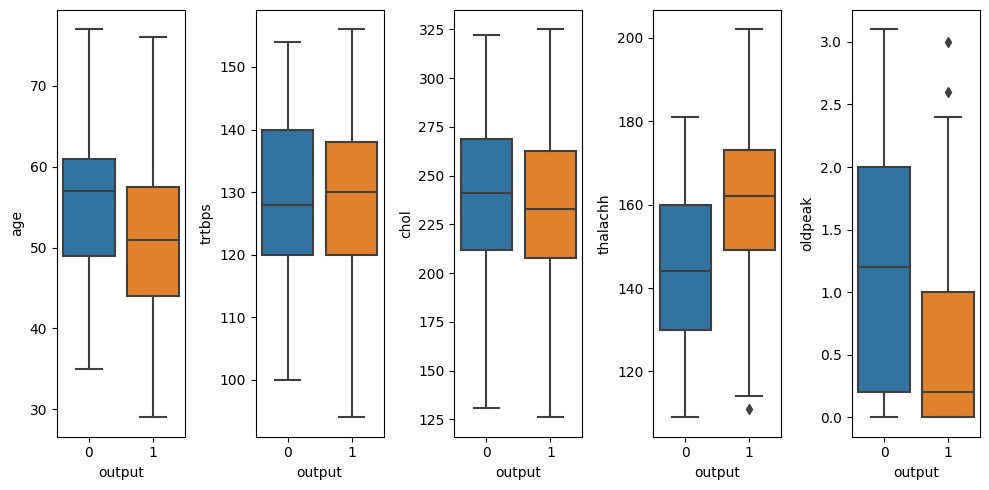

In [ ]:
fig, ax =plt.subplots(1,5,figsize=(10,5),dpi=100)
for  axis, num_var in zip(ax,numeric_var) :
  sns.boxplot(y=num_var,data=df,x='output',ax=axis)

plt.tight_layout()

데이터 분리하기

In [ ]:
# X(시험지), y(정답) 분리하기
X =df.iloc[:,:-1]
y=df['output']

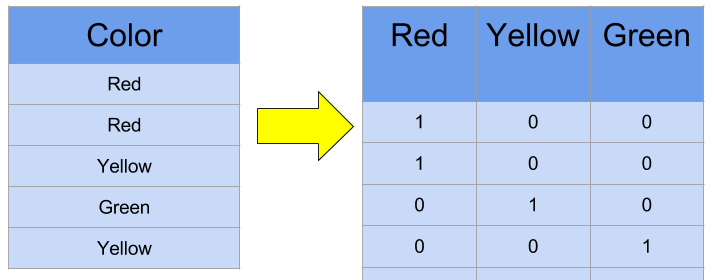

In [ ]:
# 원-핫 인코딩 처리
# 컬럼 -> 원 -핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var],drop_first=True)

In [ ]:
# 기존 데이터랑 합치기
X_modified =pd.concat([X,temp],axis=1)

In [ ]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var,axis=1, inplace=True)

In [ ]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 302
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        236 non-null    int64  
 1   trtbps     236 non-null    int64  
 2   chol       236 non-null    int64  
 3   thalachh   236 non-null    int64  
 4   oldpeak    236 non-null    float64
 5   sex_1      236 non-null    uint8  
 6   cp_1       236 non-null    uint8  
 7   cp_2       236 non-null    uint8  
 8   cp_3       236 non-null    uint8  
 9   fbs_1      236 non-null    uint8  
 10  restecg_1  236 non-null    uint8  
 11  restecg_2  236 non-null    uint8  
 12  exng_1     236 non-null    uint8  
 13  slp_1      236 non-null    uint8  
 14  slp_2      236 non-null    uint8  
 15  caa_1      236 non-null    uint8  
 16  caa_2      236 non-null    uint8  
 17  caa_3      236 non-null    uint8  
 18  caa_4      236 non-null    uint8  
 19  thall_1    236 non-null    uint8  
 20  thall_2   

훈령용,테스트 데이터 분리하기

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X_modified,y,
                                                  train_size=0.8, # test_size 0.2
                                                  # 데이터량이 적어 8:2로 나눔
                                                  random_state=7)

차원 축소 -> 스케일링

In [ ]:
# 수치형 데이터 정규화
scaler =StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

In [ ]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
108,-0.348302,-0.550325,0.161526,0.440382,0.311244,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
12,-0.454602,0.177762,0.682239,0.888982,-0.240773,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
22,-1.198702,0.905848,-0.264511,1.237894,-0.903194,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
214,0.289498,-0.186282,0.279870,-0.456820,0.421647,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0
166,1.458798,-0.550325,-0.193504,-1.204487,1.967295,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1


[setp5] 머신러닝 모델 구축 - 1) LogisticRegression

In [ ]:
log_reg=LogisticRegression().fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ',log_reg.score(X_train,y_train))
print('Test data Score: ',log_reg.score(X_test,y_test))

Train data Score:  0.8723404255319149
Test data Score:  0.875


머신러닝 모델 구축 -2) Decision Tree

In [ ]:
tree =DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf=20,
                             min_samples_split=40).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ',tree.score(X_train,y_train))
print('Test data Score: ',tree.score(X_test,y_test))

Train data Score:  0.7712765957446809
Test data Score:  0.8958333333333334


머신러닝 모델 구축 -3) GradientBoostingClassifier

In [ ]:
boost =GradientBoostingClassifier (max_depth=3,
                                   learning_rate=0.05).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ',boost.score(X_train,y_train))
print('Test data Score: ',boost.score(X_test,y_test))

Train data Score:  0.9787234042553191
Test data Score:  0.8958333333333334


In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

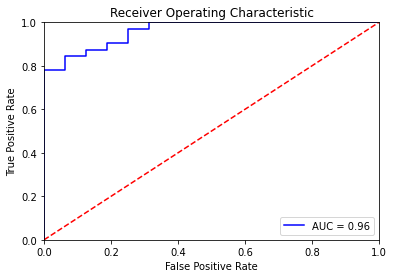

In [ ]:
#LogisticRegression
plot_auc_roc(log_reg)

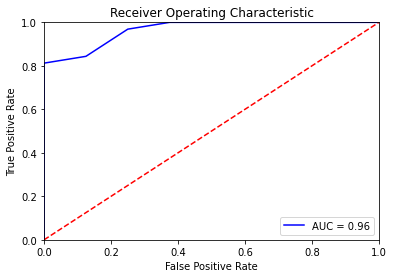

In [ ]:
#Decision Tree
plot_auc_roc(tree)

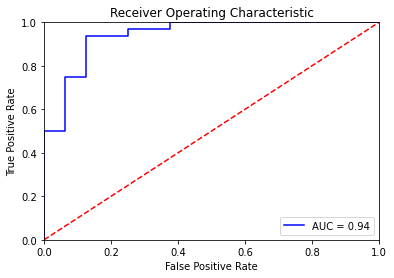

In [ ]:
#GradientBoostingClassifier
plot_auc_roc(boost)

[step6]모델성능평가

In [ ]:
#LogisticRegression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report =metrics.classification_report(y_test,lg_y_hat)
print("LogisticRegression 평가지표")
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat))

LogisticRegression 평가지표
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.91      0.91        32

    accuracy                           0.88        48
   macro avg       0.86      0.86      0.86        48
weighted avg       0.88      0.88      0.88        48

accuracy 0.875
precision 0.90625
recall 0.90625
f1 0.90625


In [ ]:
#Decision Tree 평가 지표
tr_y_hat = tree.predict(X_test)
tr_report =metrics.classification_report(y_test,tr_y_hat)
print("Decision Tree 평가지표")
print(tr_report)
print('accuracy', metrics.accuracy_score(y_test,tr_y_hat) )
print('precision', metrics.precision_score(y_test,tr_y_hat) )
print('recall', metrics.recall_score(y_test,tr_y_hat) )
print('f1', metrics.f1_score(y_test,tr_y_hat) )


Decision Tree 평가지표
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        32

    accuracy                           0.90        48
   macro avg       0.90      0.86      0.88        48
weighted avg       0.90      0.90      0.89        48

accuracy 0.8958333333333334
precision 0.8857142857142857
recall 0.96875
f1 0.9253731343283582


In [ ]:
#GradientBoostingClassifier평가 지표
bs_y_hat = boost.predict(X_test)
bs_report =metrics.classification_report(y_test,bs_y_hat)
print("GradientBoostingClassifier 평가지표")
print(bs_report)
print('accuracy', metrics.accuracy_score(y_test,bs_y_hat) )
print('precision', metrics.precision_score(y_test,bs_y_hat) )
print('recall', metrics.recall_score(y_test,bs_y_hat) )
print('f1', metrics.f1_score(y_test,bs_y_hat))


GradientBoostingClassifier 평가지표
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.91      0.94      0.92        32

    accuracy                           0.90        48
   macro avg       0.89      0.88      0.88        48
weighted avg       0.89      0.90      0.89        48

accuracy 0.8958333333333334
precision 0.9090909090909091
recall 0.9375
f1 0.923076923076923


In [ ]:
precision_list = []
recall_list = []

precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

precision_list.append(metrics.precision_score(y_test,tr_y_hat))
recall_list.append(metrics.recall_score(y_test,tr_y_hat))

precision_list.append(metrics.precision_score(y_test,bs_y_hat))
recall_list.append(metrics.recall_score(y_test,bs_y_hat))

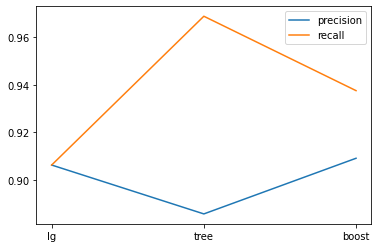

In [ ]:
plt.plot(['lg','tree','boost'],precision_list,label='precision')
plt.plot(['lg','tree','boost'],recall_list,label='recall')
plt.legend()
plt.show()